In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [4]:
data = pd.read_parquet('./2024.02.14_22.00.40_Grinding/raw/Sampling2000KHz_AEKi-0.parquet')

In [5]:
# print the first 5 rows of the data
print(data.head())

   AEKi_rate2000000_clipping0_batch0
0                          -0.002053
1                          -0.004802
2                          -0.004802
3                          -0.004802
4                          -0.008925


In [6]:
# Print the average, median, min and max values of the data
print(data.describe())

       AEKi_rate2000000_clipping0_batch0
count                       4.545616e+07
mean                       -1.252927e-03
std                         3.216744e-02
min                        -2.659464e-01
25%                        -1.717200e-02
50%                        -6.786680e-04
75%                         1.444022e-02
max                         2.645890e-01


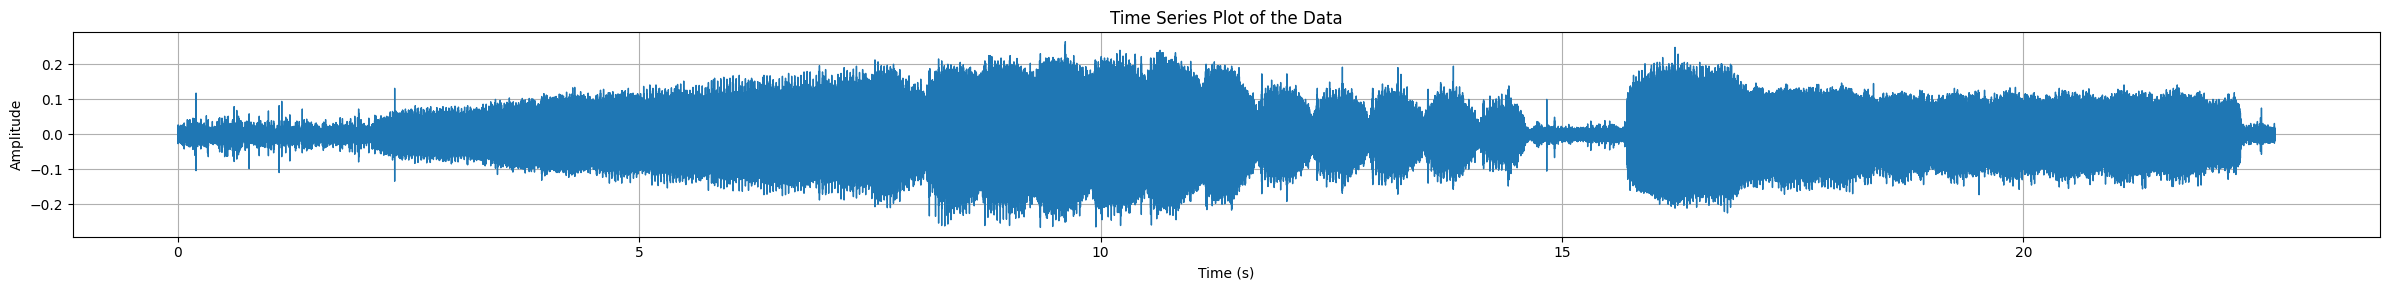

In [30]:
# Visualize the ae data

sample_rate = 2000000  # 2000 kHz
time = np.arange(len(data)) / sample_rate

# Plot the time series data
plt.figure(figsize=(24, 3))
plt.plot(time, data.iloc[:, 0], linewidth=1)  

plt.title('Time Series Plot of the Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()



Index(['AEKi_rate2000000_clipping0_batch0'], dtype='object')
<class 'numpy.ndarray'>
[-0.00205311 -0.004802   -0.004802   -0.004802   -0.00892533]


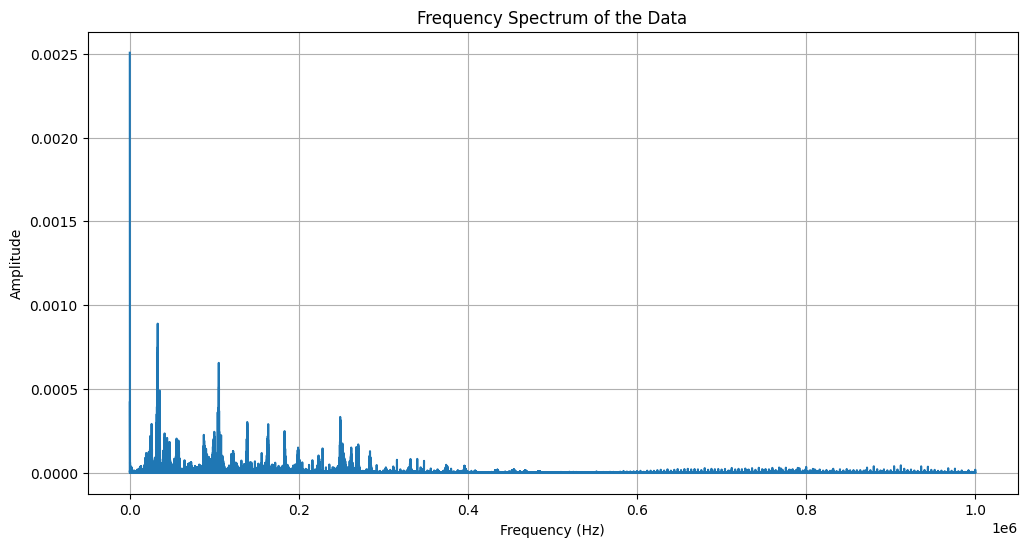

In [19]:


# Check the column names
print(data.columns)

# Define the column you want to use for FFT
column_name = 'AEKi_rate2000000_clipping0_batch0'  # Update this if the actual column name is different

# Verify if the column exists
if column_name in data.columns:
    # Extract the data for the FFT
    signal_data = data[column_name].values  # Ensure it's a NumPy array

    # Check the type and first few elements of signal_data
    print(type(signal_data))
    print(signal_data[:5])

    # Compute the FFT on a smaller sample for debugging
    N = len(signal_data)
    T = 1.0 / 2000000  # Sample spacing, 2000 kHz sample rate
    yf = fft(signal_data)
    xf = fftfreq(N, T)[:N//2]  # Only take the positive frequencies

    # Plot the FFT
    plt.figure(figsize=(12, 6))
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title('Frequency Spectrum of the Data')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()
else:
    print(f"Column '{column_name}' not found in the data.")


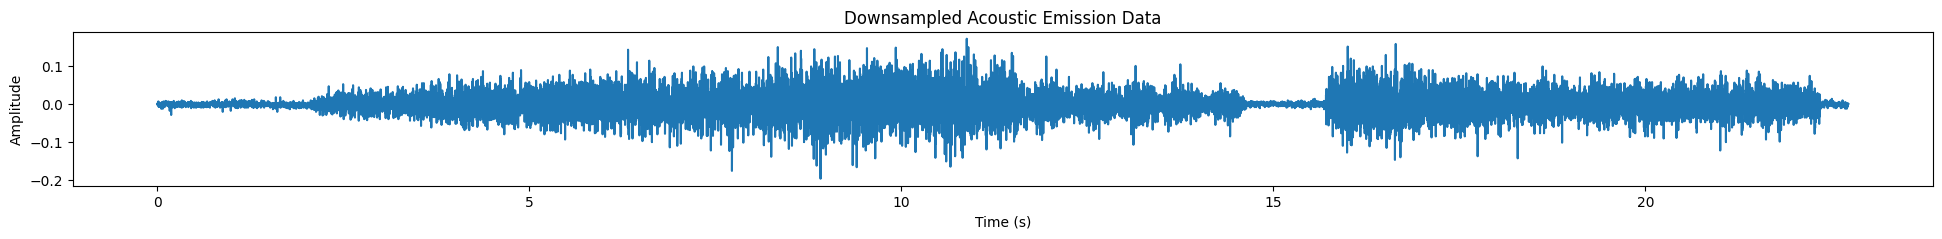

In [42]:



downsample_factor = 3000
downsampled_data = data[::downsample_factor]

# Create a time array for plotting
original_sample_rate = 2e6  # 2 MHz
downsampled_sample_rate = original_sample_rate / downsample_factor
time = np.arange(0, len(downsampled_data)) / downsampled_sample_rate

# plt.figure(figsize=(10, 6))
plt.figure(figsize=(24, 2))

plt.plot(time, downsampled_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Downsampled Acoustic Emission Data')
plt.show()